![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [5]:
df.shape

(541462, 3)

<Axes: >

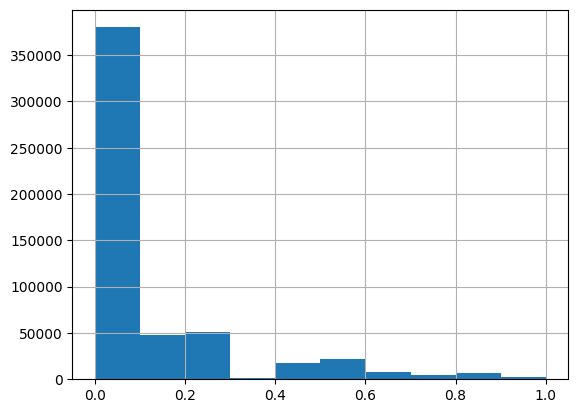

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
!pip install nltk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from nltk.stem.snowball import SnowballStemmer

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1
vect = CountVectorizer()
X_train_trans = vect.fit_transform(X_train)
X_test_trans = vect.transform(X_test)

In [13]:
# Revisamos la estructura de la matriz obtenida en el conjunto de entrenamiento,
# observamos que hay 362.779 comentarios y se generan 141.176 tokens.
X_train_trans.shape

(362779, 141176)

In [14]:
#Revismaos algunos de los tokens
print(vect.get_feature_names_out()[-150:-100])

['𝗕𝗲' '𝗙𝗮𝘁𝗵𝗲𝗿' '𝗜𝗳' '𝗦𝗼' '𝗧𝗿𝘂𝗹𝘆' '𝗮𝗻𝗱' '𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲' '𝗮𝘀' '𝗯𝗲' '𝗯𝗶𝗹𝗹𝗶𝗼𝗻' '𝗯𝘆'
 '𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂']


In [15]:
#alphas = np.logspace(-4, 4, 9)
lasso = Lasso(alpha=100)
lasso.fit(X_train_trans,y_train)
y_pred_lasso = lasso.predict(X_test_trans)
mselasso = mean_squared_error(y_test,y_pred)
#param_grid = {'alpha': alphas} 

#grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(X_train_trans, y_train)
#best_params = grid_search.best_params_
#best_estimator = grid_search.best_estimator_

NameError: name 'y_pred' is not defined

In [ ]:
#alphas = [0.01,0.1,1,10,100,1000]
#mses = []
#for alpha in alphas:
 #   ridge = Ridge(alpha=alpha)
  #  ridge.fit(X_train_trans,y_train)
   # y_pred_ridge = ridge.predict(X_test_trans)
    #mseridge = mean_squared_error(y_test,y_pred_ridge)
    #mses.append(mseridge)


#y_pred_ridge = ridge.predict(X_test_trans)
#mseridge = mean_squared_error(y_test,y_pred_ridge)

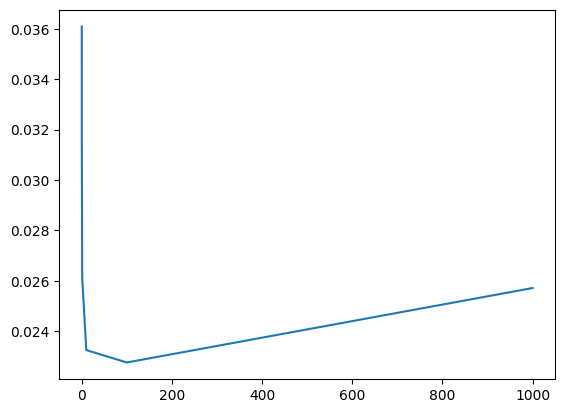

In [ ]:
plt.plot(alphas,mses)

In [20]:
best_alpha = 100
#alphas[mses.index(min(mses))]

In [21]:
mses = {}
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_trans,y_train)
y_pred_ridge = ridge.predict(X_test_trans)
mseridge = mean_squared_error(y_test,y_pred_ridge)
mses['CountVectorizerSimple'] = mseridge

In [22]:
mses

{'CountVectorizerSimple': 0.022750875565983403}

In [ ]:
EN = ElasticNet(alpha=200, l1_ratio=0.2)
EN.fit(X_train_trans,y_train)
y_pred_EN = EN.predict(X_test_trans)
mseEN = mean_squared_error(y_test,y_pred_ridge)

In [ ]:
mseridge

0.022750875565983403

In [ ]:
mseEN

0.022750875565983403

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [23]:
# Celda 2
vect_trig = CountVectorizer(ngram_range=(3,3))
X_train_trig = vect_trig.fit_transform(X_train)
X_test_trig = vect_trig.transform(X_test)
model = Ridge(alpha = best_alpha)
model.fit(X_train_trig,y_train)
y_pred_trig = model.predict(X_test_trig)
mse_trig = mean_squared_error(y_test,y_pred_trig)

In [25]:
mses['CountVectorizerTrigrama']= mse_trig

In [26]:
mses

{'CountVectorizerSimple': 0.022750875565983403,
 'CountVectorizerTrigrama': 0.03552382823645575}

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

La función TfidVectorizer es similar a la función CountVectorizer, ya que también genera una matriz con los tokens del input. Sin embargo, CountVectorizer genera la matriz con los tokens únicos y un conteo de la cantidad de veces que aparecen en todo el input, por lo que asigna la misma importancia a todos los tokens, lo que hace que al final tengan mayor peso aquellas palabras que mas se repitan. Esto, en muchos casos puede ser negativo, ya que se le da mas peso a palabras de alta frecuencia pero poco valor explicativo como conectores como: de,en,se,etc.

Así, con el fin de evitar este problema la función TfidVectorizer implementa dos segmentos en su función:

**TF (Term Frequency - Frecuencia del Término):**

$$TF = \frac{\text{Número de repeticiones de la palabra en la oración}}{\text{Número de palabras en la oración}}$$


Este término mide la frecuencia de repetición de las palabras en la oración, por lo que asigna una importancia local de la palabra en la oración, dándole mayor peso a aquellas con mayor frecuencia dentro de la oración.

**IDF (Inverse Document Frequency - Frecuencia Inversa del Documento):**

$$IDF = \log\left(\frac{\text{Número de líneas del documento}}{\text{Número de líneas que contienen la palabra}}\right)$$

Este término penaliza aquellas palabras que aparecen en demasiadas líneas del total de líneas, esto porque se usa la función logaritmo en base 10, la cual es una función creciente, por lo que entre menos aparezca la palabra en todo el documento, mayor peso tendrá en este término, y entre más aparezca, más se acercara este término a 0.

Finalmente, el valor que toma la palabra con el TfidfVectorizer corresponde al producto de estos dos términos. Por lo que al final el valor es una combinación de la frecuencia de las palabras dentro de cada línea y una penalización por el numero de repeticiones dentro de todas las líneas.

**Ventajas:**

- Penaliza palabras repetidas en todas las líneas, lo que permite reducir la complejidad del modelo, al asignar (en algunos casos) peso de 0 a palabras muy generales como conectores, que a final no agregan mucha información al modelo.
- La penalización también ayuda a reducir el peso de palabras con poco valor informativo muy repetitivas como los conectores, mientras que, el CountVectorizer les da bastante peso a estas palabras simplemente por su alta frecuencia, lo que no siempre es bueno para el modelo.

**Desventajas:**

- Suele tener mayor demanda computacional, ya que implica realizar cálculos más complejos que el simple conteo que realiza el CountVectorizer.
- Puede no funcionar muy bien en conjuntos de datos pequeños y/ o muy  específicos. Por su algoritmo de funcionamiento puede llegar a asignar pesos de forma inadecuada debido a la escasez de datos y esto se ve aún más agravado cuando las palabras son muy infrecuentes y aparecen en muy pocas líneas. Es por esto que, tiende a funcionar mejor en conjuntos de datos grandes y con términos más generales que específicos.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [29]:
# Celda 4
vect_tfid = TfidfVectorizer()
X_train_tfid = vect_tfid.fit_transform(X_train)
X_test_tfid = vect_tfid.transform(X_test)
model.fit(X_train_tfid,y_train)
y_pred_tfid = model.predict(X_test_tfid)
mse_tfid = mean_squared_error(y_test,y_pred_tfid)

In [30]:
mses['TfidfVectorizer']= mse_tfid

In [31]:
mses

{'CountVectorizerSimple': 0.022750875565983403,
 'CountVectorizerTrigrama': 0.03552382823645575,
 'TfidfVectorizer': 0.02574520587951565}

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

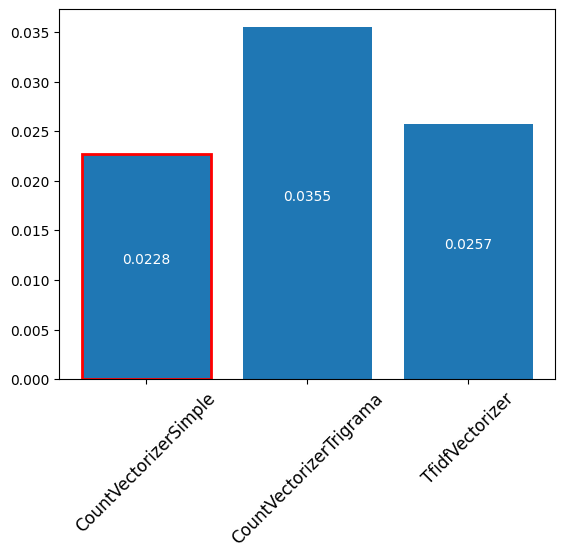

In [44]:
# Celda 5
bars = plt.bar(mses.keys(),mses.values())
min_value = min(mses.values())
for bar in bars:
    if bar.get_height() == min_value:
        bar.set_linewidth(2)  # Aumentar el grosor de la línea
        bar.set_edgecolor('red')  # Cambiar el color de la línea
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()/2, round(bar.get_height(), 4),
             ha='center', va='bottom',color='white')
plt.tight_layout
plt.xticks(rotation=45, fontsize=12)  
plt.show()

Para comenzar es importante hacer énfasis en la importancia de la tokenización para el análisis predictivo y como disponibiliza un nuevo abanico de opciones para el modelaje predictivo por medio de estructuras de datos que se componen principalmente de texto. Es decir, los datos implementados para realizar el modelo en el presente laboratorio poseen una estructura poco convencional y compleja de abordar sin realizar algún procedimiento de preprocesamiento de texto como la tokenización implementada. Así, se puede concluir que el proceso de tokenización es una herramienta efectiva y bastante útil que debería ser siempre considerada al momento de plantear un algoritmo predictivo en estructuras de datos basadas en texto.

Como es posible observar el mejor modelo obtenido fue el modelo calibrado de regresión Ridge y con preprocesamiento de texto en los datos de entrenamiento y testeo por medio de la función CountVectorizer con todos sus parámetros default. Es decir, en ambos casos, al implementar la función CountVectorizer con trigramas y usando la función TfidVectorizer con sus parámetros default, el desempeño del modelo se vio afectado negativamente, pues el MSE en ambos casos incrementó, viéndose principalmente afectados al implementar la función CountVectorizer con trigramas. De esta forma, podemos observar la influencia e importancia de realizar correctamente el preprocesamiento de texto previo a la implementación del modelo y como es importante también iterar sobre distintas posibilidades, hasta encontrar el preprocesamiento que asegure el mejor desempeño. Es decir, en ningún momento se asegura mejor desempeño a través de una función u otra, por lo que la elección de que función usar para tokenizar y los parámetros a usar en la función se convierten en un nuevo paso de calibración (además de los hiperparámtros regulares del modelo de predicción escogido). Por ejemplo en este caso el preprocesamiento que nos aseguró un mejor desempeño fue el modelo mas simple, sin embargo, no era intuitivo que así fuera y hubo la necesidad de comprobar la inferioridad en desempeño a través de otros hiperparámetros y funciones para hacer la selección.

Finalmente, la simplicidad del CountVectorizer para este contexto resultó ser adecuada, es decir, los trigramas terminan siendo contraproducentes, la introducción de mas contexto en este caso fue contraproducente, obteniendo el peor de los resultados por medio de este preprocesamiento. Asimismo, la introducción de los pesos por medio de la función TfidVectorizer resulto contraproducente también, aunque el valor de MSE se acerca más al mínimo obtenido a comparación de la implementación con trigramas. Esto podría ser explicado porque los pesos se están distribuyendo de manera errónea y un contexto tan especifico seguramente existen palabras muy repetitivas en cada línea con alto valor explicativo que están siendo muy penalizadas, por lo que se les resta importancia al momento de predecir, lo que resulta contraproducente.

